In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from prophet import Prophet
import matplotlib.pyplot as plt
import os

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [3]:
import os

data_folder = "Calgary Temperature\Calgary Temperature"
files_list = os.listdir(data_folder)
# print(files_list)

In [4]:
df = pd.DataFrame()
for file in files_list:
    data = pd.read_csv( f'{os.getcwd()}\{data_folder}\{file}' )
    data.head()
    df = pd.concat([df, data], axis=0)

print(df.shape)
df.head()

(14111, 23)


,Datetime,Temperature,Apparent Temperature,Cloud Cover,Dew Point,DHI,DNI,Solar Zenith Angle,GHI,Pod,...,Sea Level Pressure,Snow Depth,Solar Radiation,Visibility,Weather Description,Weather Code,Weather Icon,Wind Direction,Wind Gust Speed,Wind Speed
0,2022-04-01T00:00:00,3.0,1.7,75.0,-8.0,0,0,-30.2,0,n,...,1013.0,0.0,0.0,16.0,Overcast clouds,804,c04n,270.0,4.4,1.5
1,2022-04-01T01:00:00,3.0,2.5,75.0,-8.0,0,0,-33.5,0,n,...,1013.0,0.0,0.0,16.0,Overcast clouds,804,c04n,270.0,4.0,1.0
2,2022-04-01T02:00:00,2.0,-0.6,75.0,-7.1,0,0,-34.0,0,n,...,1014.0,0.0,0.0,16.0,Overcast clouds,804,c04n,260.0,4.4,2.4
3,2022-04-01T03:00:00,1.0,-0.6,21.0,-7.0,0,0,-31.5,0,n,...,1014.0,0.0,0.0,16.0,Scattered clouds,802,c02n,250.0,4.4,1.5
4,2022-04-01T04:00:00,0.0,-0.8,75.0,-7.9,0,0,-26.6,0,n,...,1014.0,0.0,0.0,16.0,Overcast clouds,804,c04n,275.0,4.4,1.0


In [68]:
# creating new dataset for fb prophet

In [5]:
# to interpolate the missing values 
new_df = df.ffill()
print(df.isnull().sum())
print(new_df.isna().sum())

Datetime                  0
Temperature             667
Apparent Temperature    667
Cloud Cover             667
Dew Point               667
DHI                       0
DNI                       0
Solar Zenith Angle        0
GHI                       0
Pod                       0
Precipitation             0
Pressure                667
Relative Humidity       667
Sea Level Pressure      667
Snow Depth              667
Solar Radiation         400
Visibility              667
Weather Description       0
Weather Code              0
Weather Icon              0
Wind Direction          667
Wind Gust Speed         667
Wind Speed              667
dtype: int64
Datetime                0
Temperature             0
Apparent Temperature    0
Cloud Cover             0
Dew Point               0
DHI                     0
DNI                     0
Solar Zenith Angle      0
GHI                     0
Pod                     0
Precipitation           0
Pressure                0
Relative Humidity       0
Sea L

In [20]:
new_df = df[['Datetime', 'Temperature']].copy()

print(new_df.isna().sum())
new_df = new_df.ffill()
print(new_df.isna().sum())

new_df['Datetime'] = pd.to_datetime(new_df["Datetime"])
new_df.index = pd.DatetimeIndex(new_df['Datetime'])

new_df.head()

Datetime         0
Temperature    667
dtype: int64
Datetime       0
Temperature    0
dtype: int64


,Datetime,Temperature
Datetime,,
2022-04-01 00:00:00,2022-04-01 00:00:00,3.0
2022-04-01 01:00:00,2022-04-01 01:00:00,3.0
2022-04-01 02:00:00,2022-04-01 02:00:00,2.0
2022-04-01 03:00:00,2022-04-01 03:00:00,1.0
2022-04-01 04:00:00,2022-04-01 04:00:00,0.0


In [21]:
new_df['Temperature'].min()

-31.0

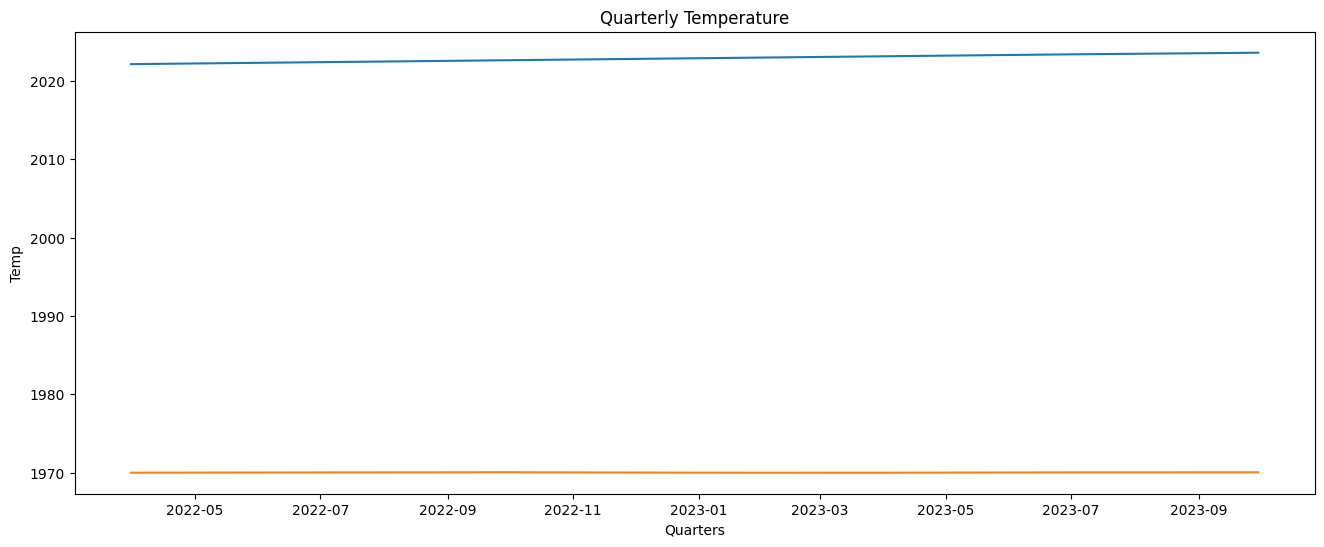

In [23]:
# Quaterly
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.plot(new_df.resample('Q').mean())
plt.title('Quarterly Temperature')
plt.xlabel('Quarters')
plt.ylabel('Temp')
plt.show()

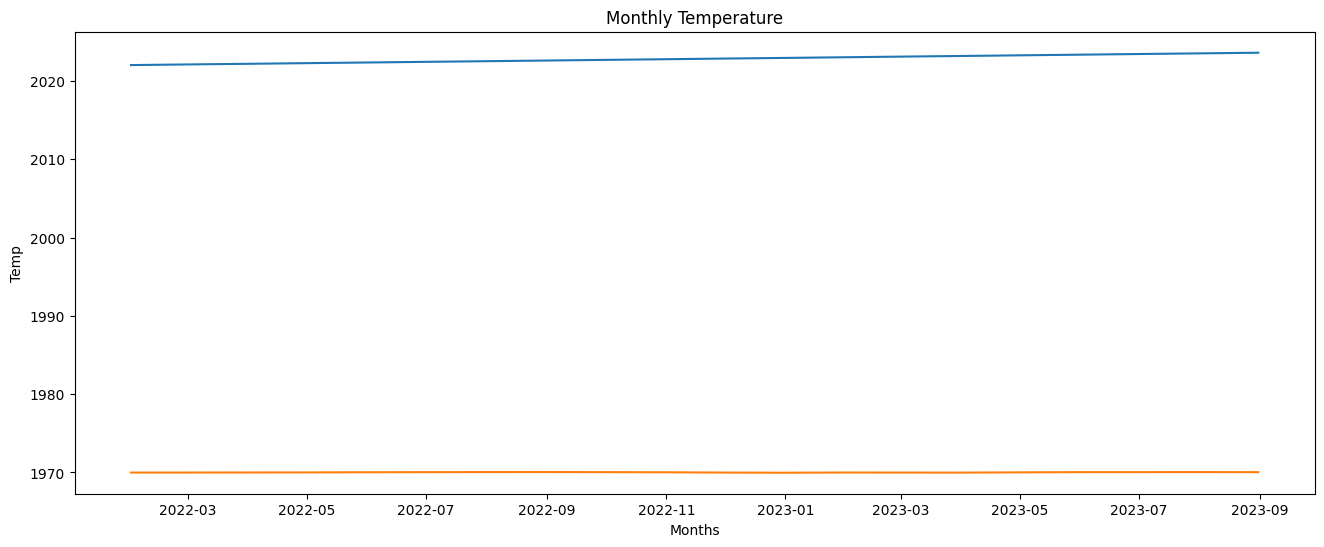

In [24]:
# Resample is a Convenience method for frequency conversion and resampling of time series.
plt.figure(figsize=(16,6))
plt.plot(new_df.resample('M').mean())
plt.title('Monthly Temperature')
plt.xlabel('Months')
plt.ylabel('Temp')
plt.show()

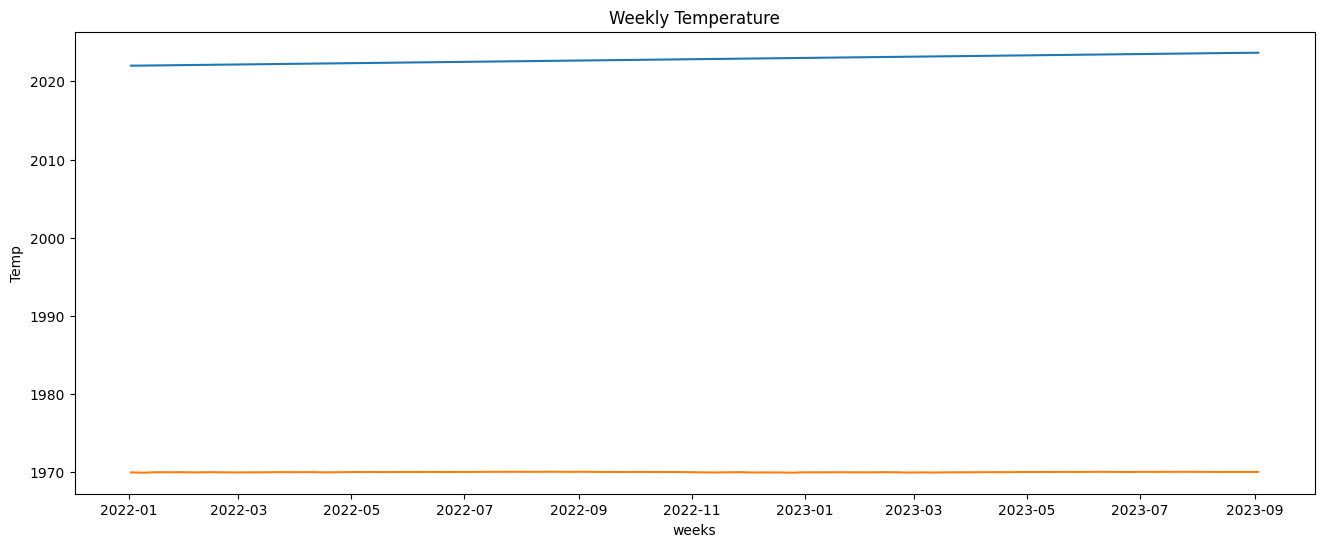

In [25]:
# Resample is a Convenience method for frequency conversion and resampling of time series.
plt.figure(figsize=(16,6))
plt.plot(new_df.resample('W').mean())
plt.title('Weekly Temperature')
plt.xlabel('weeks')
plt.ylabel('Temp')
plt.show()

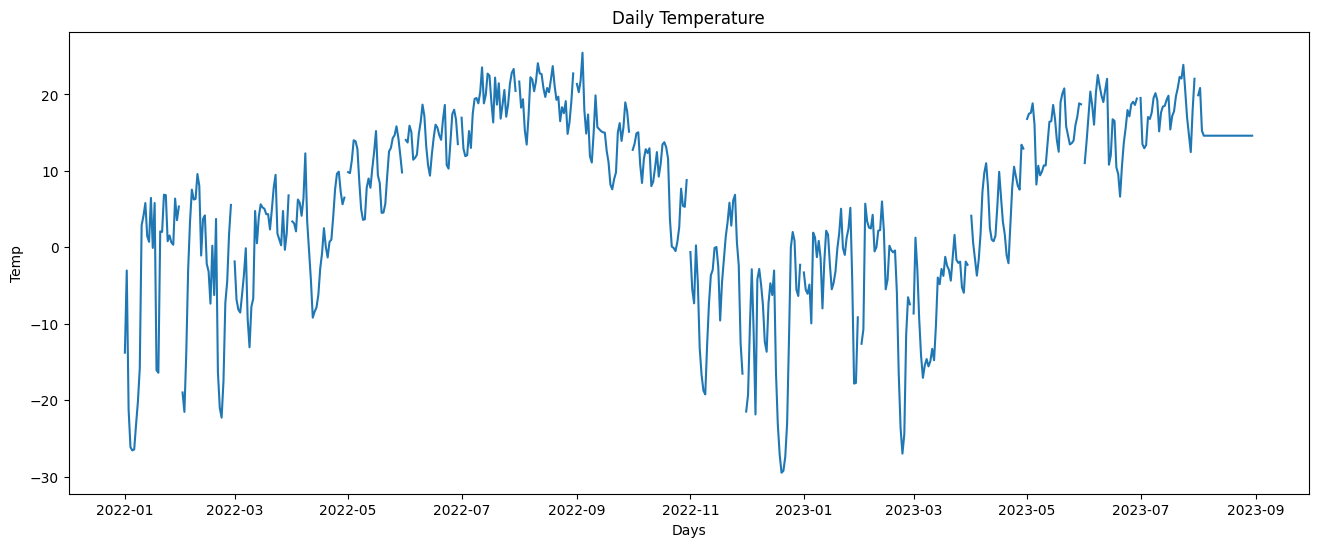

In [11]:
# Resample is a Convenience method for frequency conversion and resampling of time series.
plt.figure(figsize=(16,6))
plt.plot(new_df.resample('D').mean())
plt.title('Daily Temperature')
plt.xlabel('Days')
plt.ylabel('Temp')
plt.show()

In [26]:
#preparing data
fb_df = new_df
# fb_df["ds"] = fb_df["Datetime"]
fb_df = fb_df.rename(columns={'Datetime':'ds', 'Temperature':'y'})  

fb_df

,ds,y
Datetime,,
2022-04-01 00:00:00,2022-04-01 00:00:00,3.0
2022-04-01 01:00:00,2022-04-01 01:00:00,3.0
2022-04-01 02:00:00,2022-04-01 02:00:00,2.0
2022-04-01 03:00:00,2022-04-01 03:00:00,1.0
2022-04-01 04:00:00,2022-04-01 04:00:00,0.0
...,...,...
2023-05-30 19:00:00,2023-05-30 19:00:00,25.0
2023-05-30 20:00:00,2023-05-30 20:00:00,24.0
2023-05-30 21:00:00,2023-05-30 21:00:00,23.0


## n numbers of prediction by forcast_period

In [27]:
forcast_period = 7

In [28]:
m = Prophet()
m.fit(fb_df)

future = m.make_future_dataframe(periods=forcast_period)
forecast = m.predict(future)

22:18:30 - cmdstanpy - INFO - Chain [1] start processing
22:18:49 - cmdstanpy - INFO - Chain [1] done processing


Electricity Prediction for next 24 hours

C:\Users\Acer\AppData\Local\Temp\ipykernel_5124\1504748603.py:6: RuntimeWarning: divide by zero encountered in divide
  accuracy  = (predicted_values / actual_values) * 100


Final Accuracy: 84.9297076433352 %
Mean Absolute Error: 12.48
Mean Squared Error: 240.88
Root Mean Squared Error: 15.52


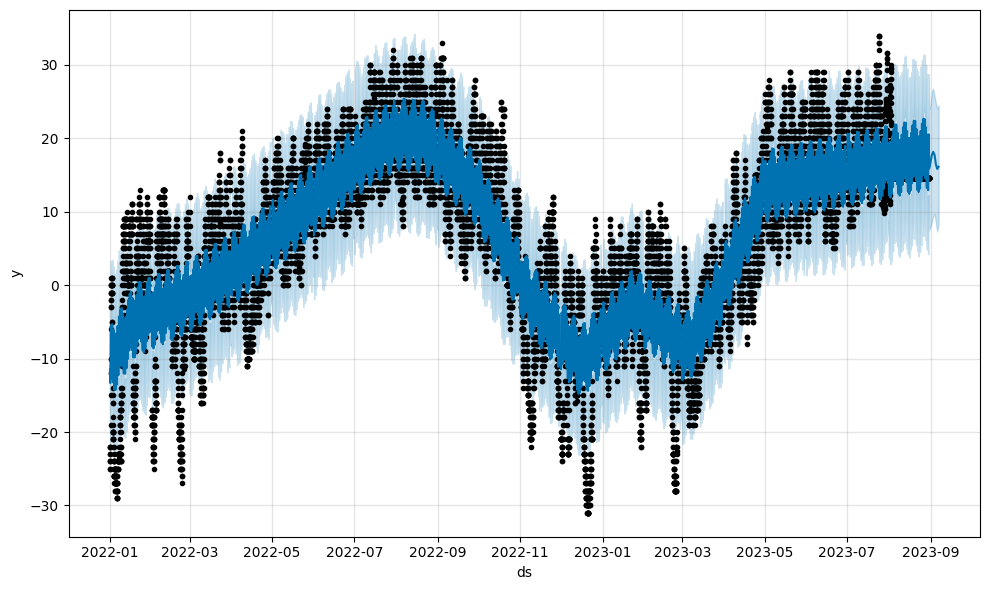

In [48]:
# Extract the actual values and predicted values
actual_values = fb_df['y'].values
predicted_values = forecast[-len(fb_df):]['yhat'].values


accuracy  = (predicted_values / actual_values) * 100
print(f"Final Accuracy: {accuracy[-1]} %")


# Calculate accuracy metrics (e.g., Mean Absolute Error, Mean Squared Error, etc.)
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = mse ** 0.5

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

# Optionally, you can visualize the predictions
fig = m.plot(forecast)
plt.show()
# This code sets up a Prophet model, fits it to your training data, makes predictions on the test data, calculates accuracy metrics, and optionally visualizes the predictions. You can adjust the model parameters and evaluation metrics based on your specific forecasting needs and dataset.






